<a href="https://colab.research.google.com/github/Dharaniaids/CodeAlpha_A-B-TestingAnalysis/blob/main/Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name : DHARANI. S**

**Task3 : A/B Testing Analysis**


**Intern ID : CA/O3/45464**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
game = pd.read_csv('/content/games.csv')

In [3]:
game.head()


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


**RELEVANT COLUMNS TO NUMERIC**

In [6]:
game['white_rating'] = pd.to_numeric(game['white_rating'],errors='coerce')
game['black_rating'] = pd.to_numeric(game['black_rating'],errors='coerce')

**DROP THE NULL VALUES**

In [7]:
game.dropna(inplace=True)

In [8]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


**GROUPING**

In [9]:
group_A = game[game['rated'] == True]
group_B = game[game['rated'] == False]

**MEAN VALUE**

In [10]:
metric_A = group_A['turns']
metric_B = group_B['turns']


In [11]:
metric_A.mean()

61.96255029402662

In [12]:
metric_B.mean()

54.27158595951832

**T-TEST**

In [13]:
from scipy import stats

In [14]:
m_value, d_value = stats.ttest_ind(metric_A, metric_B)

In [16]:
m_value

12.897741766362673

In [17]:
d_value

6.558507222048786e-38

In [18]:
alpha =0.05
if d_value < alpha :
  print("Reject the null hypothesis. There is a significant difference.")
else:
  print("Accept the null hypothesis. There is a no significant difference.")


Reject the null hypothesis. There is a significant difference.


**VISUALIZATION**

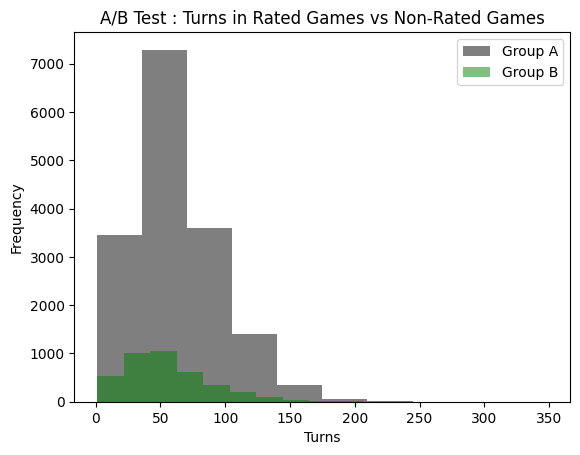

In [29]:
plt.hist(metric_A, alpha=0.5, label ='Group A',color='BLACK')
plt.hist(metric_B, alpha=0.5, label ='Group B',color='GREEN')
plt.legend(loc='upper right')
plt.xlabel('Turns')
plt.ylabel('Frequency')
plt.title('A/B Test : Turns in Rated Games vs Non-Rated Games')
plt.show()